In [ ]:
pip install vaderSentiment

In [ ]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
	
	# Create a SentimentIntensityAnalyzer object.
	sid_obj = SentimentIntensityAnalyzer()
	# polarity_scores method of SentimentIntensityAnalyzer
	# object gives a sentiment dictionary.
	# which contains pos, neg, neu, and compound scores.
	sentiment_dict = sid_obj.polarity_scores(sentence)
	
	print("Overall sentiment dictionary is : ", sentiment_dict)
	print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
	print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
	print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")
	print("Sentence Overall Rated As", end = " ")

	# decide sentiment as positive, negative and neutral
	if sentiment_dict['compound'] >= 0.05 :
		print("Positive")
	elif sentiment_dict['compound'] <= - 0.05 :
		print("Negative")
	else :
		print("Neutral")

In [ ]:
sentence = input("Enter the Statement:")
sentiment_scores(sentence)

Enter the Statement:happy
Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5719}
sentence was rated as  0.0 % Negative
sentence was rated as  0.0 % Neutral
sentence was rated as  100.0 % Positive
Sentence Overall Rated As Positive


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers

from tensorflow.keras import layers
from tensorflow.keras import losses

from collections import Counter


import pandas as pd
import numpy as np

import sklearn


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


import seaborn as sns

import pydot

In [ ]:
print(tf.__version__)

2.7.0


In [ ]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Please install GPU version of TF


##Dataset and Preprocessing

In [ ]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' '
    #print(delete_dict)
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print(text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    #print(text2)
    return text2.lower()

In [ ]:
for sp_character in string.punctuation:
    print(sp_character)

!
"
#
$
%
&
'
(
)
*
+
,
-
.
/
:
;
<
=
>
?
@
[
\
]
^
_
`
{
|
}
~


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
review_data = pd.read_csv("/content/drive/My Drive/test.csv")

In [ ]:
##from google.colab import files
##uploaded = files.upload()

In [ ]:
##= pd.read_csv("test (1).csv")

In [ ]:
print(review_data.head(10))

                                              Review  Label
0  Great CD: My lovely Pat has one of the GREAT v...      2
1  One of the best game music soundtracks - for a...      2
2  Batteries died within a year ...: I bought thi...      1
3  works fine, but Maha Energy is better: Check o...      2
4  Great for the non-audiophile: Reviewed quite a...      2
5  DVD Player crapped out after one year: I also ...      1
6  Incorrect Disc: I love the style of this, but ...      1
7  DVD menu select problems: I cannot scroll thro...      1
8  Unique Weird Orientalia from the 1930's: Exoti...      2
9  Not an "ultimate guide": Firstly,I enjoyed the...      1


In [ ]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Review  400000 non-null  object
 1   Label   400000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.1+ MB


In [ ]:
review_data.dropna(axis = 0, how ='any',inplace=True) 

In [ ]:
review_data['Review'] = review_data['Review'].apply(clean_text)

In [ ]:
review_data['Review_Split'] = review_data['Review'].apply(lambda x:len(str(x).split())) 

In [ ]:
review_data

,Review,Label,Review_Split
0,great lovely pat has one the great voices her ...,2,77
1,one the best game music soundtracks for game d...,2,112
2,batteries died within year bought this charger...,1,46
3,works fine but maha energy better check out ma...,2,33
4,great for the nonaudiophile reviewed quite bit...,2,56
...,...,...,...
399995,unbelievable bad way bought this thomas for ou...,1,122
399996,almost great until broke son recieved this bir...,1,84
399997,disappointed bought this toy for son who loves...,1,94
399998,classic jessica mitford this compilation wide ...,2,29


In [ ]:
review_data['Review_Split'].describe()

count    400000.000000
mean         61.022917
std          33.424153
min           0.000000
25%          33.000000
50%          54.000000
75%          84.000000
max         173.000000
Name: Review_Split, dtype: float64

Label Encoding 0-Neg 1-Pos

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder() 
review_data['Label'] = lb.fit_transform(review_data['Label'])

In [ ]:
print(review_data['Label'].unique())

[1 0]


In [ ]:
mask = (review_data['Review_Split'] < 100) & (review_data['Review_Split'] >=20)
df_short_reviews = review_data[mask]
print('No of Short reviews')
print(len(df_short_reviews))

mask = review_data['Review_Split'] >= 100
df_long_reviews = review_data[mask]
print('No of Long reviews')
print(len(df_long_reviews))

No of Short reviews
313178
No of Long reviews
63644


In [ ]:
print(df_short_reviews['Review_Split'].max())

99


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(review_data['Review'].tolist(),review_data['Label'].tolist(),test_size=0.5,stratify = review_data['Label'].tolist(),random_state=0)

print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))

Train data len:200000
Class distributionCounter({1: 100000, 0: 100000})
Valid data len:200000
Class distributionCounter({1: 100000, 0: 100000})


In [ ]:
X_valid

['best available ive purchased bali attire for many years always happy with itthis product came quickly advertised pleased with the product and with the vendor',
 'they say bought this game gift for one grand children they like like too',
 '50s harmonies and spooky drum machinesnail the head frusciante has succeeded releasing album which feels like more artistic the way which the chili peppers should rename their group john frusciante and the hot three more seriously thoughits work art that has 50s harmonies with spooky drum machine tracks carvel real gem opens the with feel psychadelic beach boys songs like regret and ricky feel like should drinking white wine feeling happy john has succeeded producing album that has outdone record only water for ten days',
 'well dont get wrong really didnt mind their first album like listening many different genres music and not usually very picky when first heard allamericanregects were coming out with another album first response was cool friend m

####Tokenizer

Basically we create a dictionary with the seperate integers which is used for training

In [ ]:
num_words = 50000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(X_train)
print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[48311, 64, 14, 9]]


In [ ]:
print(str(tokenizer.texts_to_sequences(['are'])))

[[14]]


In [ ]:
x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(review_data['Review'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=100)
x_valid = pad_sequences(x_valid, padding='post', maxlen=100)
x_test = pad_sequences(x_test, padding='post', maxlen=100)



train_labels = np.asarray(y_train )
valid_labels = np.asarray( y_valid)

test_labels = np.asarray(review_data['Label'].tolist())

print('Train data len:'+str(len(x_train)))
print('Class distribution'+str(Counter(train_labels)))

print('Validation data len:'+str(len(x_valid)))
print('Class distribution'+str(Counter(valid_labels)))

print('Test data len:'+str(len(x_test)))
print('Class distribution'+str(Counter(test_labels)))


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify '

Train data len:200000
Class distributionCounter({1: 100000, 0: 100000})
Validation data len:200000
Class distributionCounter({1: 100000, 0: 100000})
Test data len:400000
Class distributionCounter({1: 200000, 0: 200000})


In [ ]:
x_test

array([[   17,  1544,  4502, ...,     0,     0,     0],
       [    2,   300,     6, ...,     2,   334,   134],
       [  624,   960,   497, ...,     0,     0,     0],
       ...,
       [  174,    73,     4, ...,     0,     0,     0],
       [  355,  5001, 15114, ...,     0,     0,     0],
       [ 3184,     2,   981, ...,    13,   167,  1269]], dtype=int32)

In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==1:
        break
count =0
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

======Train dataset ====
tf.Tensor(
[    1 28621   436   223    17 47391   151     5  9823     6    57  5169
 23611   601   542     1    76     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0], shape=(100,), dtype=int32) tf.Tensor(1, shape=(), dtype=int64)
======Validation dataset ====
tf.Tensor(
[   65   535   108   189 20449 22195     5    84   111   209   307    10
  5753    61   224   517   925   707    10     2    61     3    10     2
  2214     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0

##LSTM based sentiment classification model

In [ ]:
max_features =50000
embedding_dim =16
sequence_length = 100

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,embeddings_regularizer = regularizers.l2(0.005))) 
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.LSTM(embedding_dim,dropout=0.2, recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(0.005),bias_regularizer=regularizers.l2(0.005)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(8, activation='relu',kernel_regularizer=regularizers.l2(0.001),bias_regularizer=regularizers.l2(0.001),))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
                               
model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(1e-3),metrics=[tf.keras.metrics.BinaryAccuracy()])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 100, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               819712    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

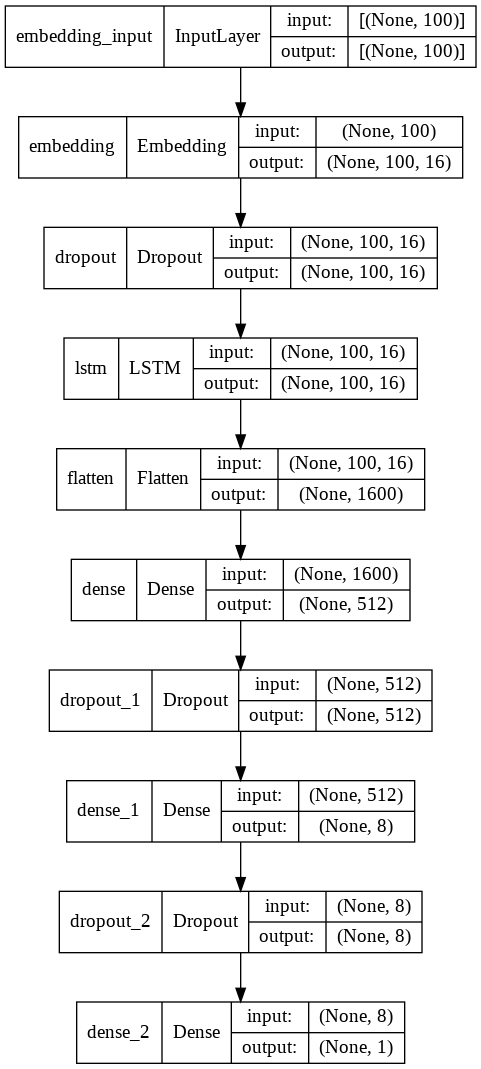

In [ ]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
epochs = 10
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(5000).batch(1024),epochs= epochs, validation_data=valid_ds.batch(1024), verbose=1)

Epoch 1/10
196/196 [==============================] - 118s 583ms/step - loss: 0.9433 - binary_accuracy: 0.7684 - val_loss: 0.4679 - val_binary_accuracy: 0.8804
Epoch 2/10
196/196 [==============================] - 116s 593ms/step - loss: 0.5063 - binary_accuracy: 0.8593 - val_loss: 0.4476 - val_binary_accuracy: 0.8788
Epoch 3/10
196/196 [==============================] - 116s 593ms/step - loss: 0.4867 - binary_accuracy: 0.8615 - val_loss: 0.4191 - val_binary_accuracy: 0.8856
Epoch 4/10
196/196 [==============================] - 118s 603ms/step - loss: 0.4749 - binary_accuracy: 0.8641 - val_loss: 0.4173 - val_binary_accuracy: 0.8816
Epoch 5/10
196/196 [==============================] - 115s 588ms/step - loss: 0.4668 - binary_accuracy: 0.8647 - val_loss: 0.4257 - val_binary_accuracy: 0.8782
Epoch 6/10
196/196 [==============================] - 112s 569ms/step - loss: 0.4604 - binary_accuracy: 0.8644 - val_loss: 0.4033 - val_binary_accuracy: 0.8844
Epoch 7/10
196/196 [====================

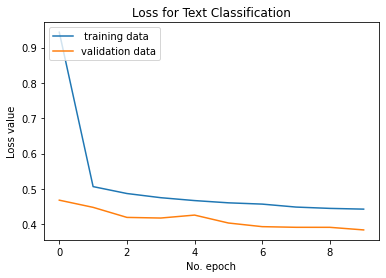

In [ ]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

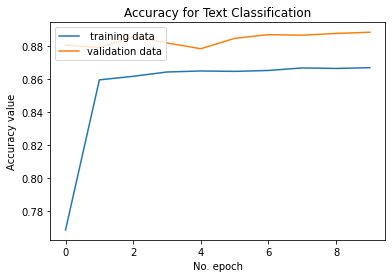

In [ ]:
plt.plot(history.history['binary_accuracy'], label=' training data')
plt.plot(history.history['val_binary_accuracy'], label='validation data')
plt.title('Accuracy for Text Classification')
plt.ylabel('Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
model.save('tf_lstmmodel.h5') 
json_string = tokenizer.to_json()

In [ ]:
import json
with open('tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

In [ ]:
valid_predict= model.predict(x_valid)

In [ ]:
x_valid

array([[  65,  535,  108, ...,    0,    0,    0],
       [  21,  121,   73, ...,    0,    0,    0],
       [3460, 5412,    3, ...,    0,    0,    0],
       ...,
       [ 228,  114,    7, ...,    0,    0,    0],
       [  40,  159,   38, ...,    0,    0,    0],
       [  21,  178,   69, ...,    0,    0,    0]], dtype=int32)

In [ ]:

print(valid_predict[:10])

[[0.9995233 ]
 [0.32374546]
 [0.8366288 ]
 [0.10332608]
 [0.9993384 ]
 [0.00685495]
 [0.08433935]
 [0.91069424]
 [0.99173725]
 [0.97327006]]


In [ ]:
def Sentiment(x):
  y=[]
  y.append(x)
  x_tok = np.array(tokenizer.texts_to_sequences(y))
  x_tok = pad_sequences(x_tok, padding='post', maxlen=100)
  predictions = model.predict(x_tok)
  if predictions[0][0] <0.5:
    return "Negative"
  elif predictions[0][0] >0.78:
    return "Positive"
  else:
    return "Nuetral"

In [ ]:
st = input("Enter String for Sentiment Analysis")
print(Sentiment(st))

Nuetral


In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, thresholds = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives Rate')
    plt.ylabel('True positives Rate')
    plt.xlim([-0.03, 1.0])
    plt.ylim([0.0, 1.03])
    plt.grid(True)
    thresholdsLength = len(thresholds)
    thresholds_every = 1000
    colorMap = plt.get_cmap('jet', thresholdsLength)
    for i in range(0, thresholdsLength, thresholds_every):
        threshold_value_with_max_four_decimals = str(thresholds[i])[:5]
        plt.text(fp[i] - 0.03, tp[i] + 0.001, threshold_value_with_max_four_decimals, fontdict={'size': 15}, color=colorMap(i/thresholdsLength));

    ax = plt.gca()
    ax.set_aspect('equal')

In [ ]:
mpl.rcParams['figure.figsize'] = (16, 16)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

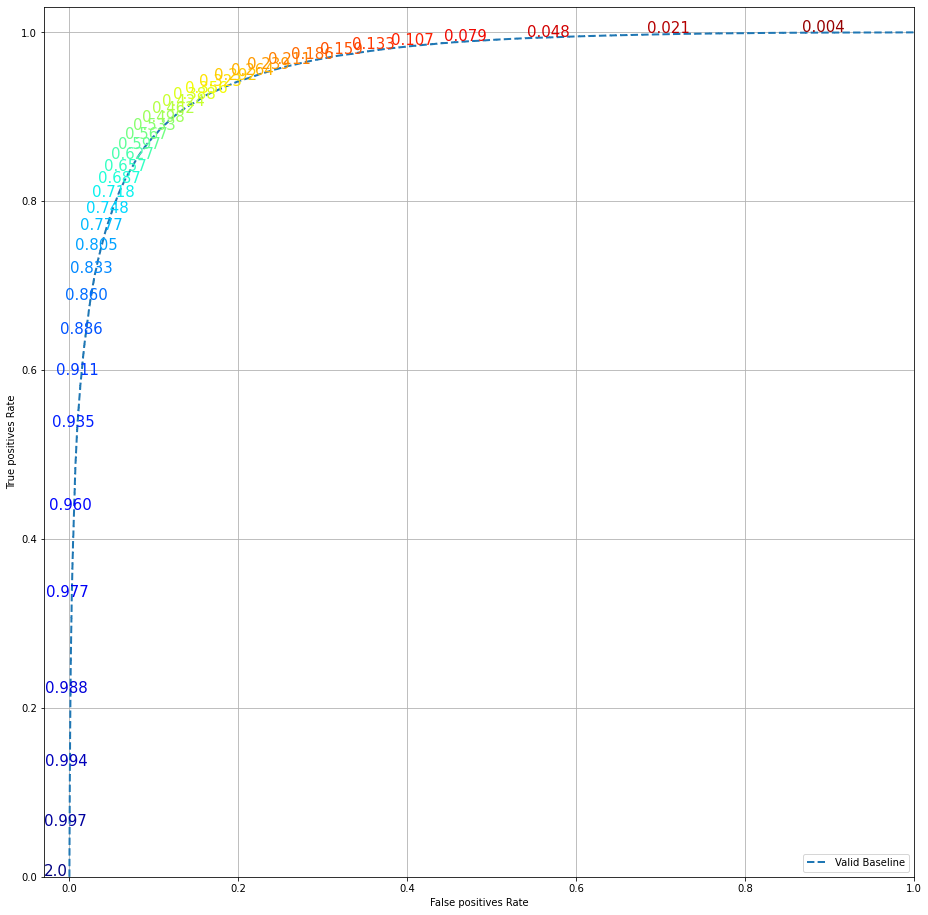

In [ ]:
plot_roc("Valid Baseline", valid_labels, valid_predict, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
new_model = tf.keras.models.load_model('tf_lstmmodel.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           800016    
                                                                 
 dropout (Dropout)           (None, 100, 16)           0         
                                                                 
 lstm (LSTM)                 (None, 100, 16)           2112      
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               819712    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 8)                 4

In [ ]:
with open('tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

In [ ]:
x_test  = np.array( tokenizer.texts_to_sequences(review_data['Review'].tolist()) )
x_test = pad_sequences(x_test, padding='post', maxlen=100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
print("Generate predictions for all samples")
ps = new_model.predict(x_test)

Generate predictions for all samples


In [ ]:
review_data['pred_sentiment']= ps
review_data['pred_sentiment'] = np.where((review_data.pred_sentiment >= 0.78),1,review_data.pred_sentiment)
review_data['pred_sentiment'] = np.where((review_data.pred_sentiment < 0.78),0,review_data.pred_sentiment)

In [ ]:
labels = [0, 1]
print(classification_report(review_data['Label'].tolist(),review_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87    200000
           1       0.96      0.73      0.83    200000

    accuracy                           0.85    400000
   macro avg       0.87      0.85      0.85    400000
weighted avg       0.87      0.85      0.85    400000



In [ ]:
y=[]
x = input("Enter String for Sentiment Analysis: ")
y.append(x)
xy = np.array(tokenizer.texts_to_sequences(y))
xy = pad_sequences(xy, padding='post', maxlen=100)
predictions = new_model.predict(xy)
if predictions[0][0] <0.5:
  print("Negative")
elif predictions[0][0] >0.78:
  print("Positive")
else:
  print("Neutral")

Enter String for Sentiment Analysis: good
Positive


The experience was just satisfactory but your executive was not polite

In [ ]:
y=[]
x = input("Enter String for Sentiment Analysis: ")
y.append(x)
xy = np.array(tokenizer.texts_to_sequences(y))
xy = pad_sequences(xy, padding='post', maxlen=100)
predictions = new_model.predict(xy)
if predictions[0][0] <0.5:
  print("Negative")
elif predictions[0][0] >0.78:
  print("Positive")
else:
  print("Neutral")

Enter String for Sentiment Analysis: The experience was just satisfactory but your executive was not polite
Negative


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Sentiment_vader.ipynb')

--2021-11-23 08:39:55--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-11-23 08:39:55 (29.2 MB/s) - ‘colab_pdf.py’ saved [1864/1864]





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Sentiment_vader.ipynb to pdf
[NbConvertApp] Support files will be in Sentiment_vader_files/
[NbConvertApp] Making directory ./Sentiment_vader_files
[NbConvertApp] Making directory ./Sentiment_vader_files
[NbConvertApp] Making directory ./Sentiment_vader_files
[NbConvertApp] Writing 469502 bytes to ./noteb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-latex-extra set to manually installed.
texlive-xetex is already the newest version (2017.20180305-1).
The following NEW packages will be installed:
  texlive
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 14.4 kB of archives.
After this operation, 70.7 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 texlive all 2017.20180305-1 [14.4 kB]
Fetched 14.4 kB in 0s (51.3 kB/s)
Selecting previously unselected package texlive.
(Reading database ... 181407 files and directories currently installed.)
Preparing to unpack .../texlive_2017.20180305-1_all.deb ...
Unpacking texlive (2017.20180305-1) ...
Setting up texlive (2017.20180305-1) ...
  Created w

In [ ]:
!cp "./drive/My Drive/Colab Notebooks/Sentiment_vader.ipynb" ./
!jupyter nbconvert --to PDF "Sentiment_vader.ipynb"

[NbConvertApp] Converting notebook Sentiment_vader.ipynb to PDF
[NbConvertApp] Support files will be in Sentiment_vader_files/
[NbConvertApp] Making directory ./Sentiment_vader_files
[NbConvertApp] Making directory ./Sentiment_vader_files
[NbConvertApp] Making directory ./Sentiment_vader_files
[NbConvertApp] Writing 469502 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: [u'xelatex', u'./notebook.tex', '-quiet']
This is XeTeX, Version 3.14159265-2.6-0.99998 (TeX Live 2017/Debian) (preloaded format=xelatex)
 restricted \write18 enabled.
entering extended mode
(./notebook.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 3 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size11.clo))
(/usr/share/texlive